# Numerical differentiation

In [102]:
import sys

sys.path.append('..')

### Example

$y = x \cdot ln(x)$, where $x \in [1, 10]$

##### Finite difference method to calculate $f'(x)$

In [103]:
import numpy as np
from math import log

def f(x): return x * log(x)

dx = [1, 0.1, 0.01]

x = [np.arange(1, 10 + d / 2, d) for d in dx]
y = [np.array([f(s) for s in t]) for t in x]

df_fd = [np.zeros(len(t)) for t in x]

for i in range(len(x)):
    n = len(x[i])

    for j in range(1, n-1):
        df_fd[i][j] = (y[i][j+1] - y[i][j-1])/2/dx[i]

    df_fd[i][0] = (-3*y[i][0] + 4*y[i][1] - y[i][2])/2/dx[i]
    df_fd[i][n-1] = (y[i][n-3] - 4*y[i][n-2] + 3*y[i][n-1])/2/dx[i]

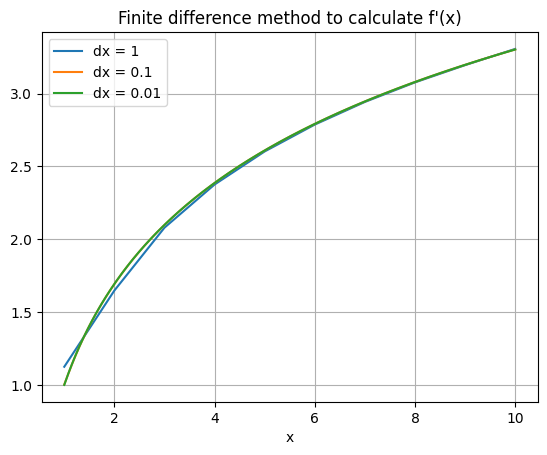

In [104]:
from matplotlib import pyplot as plt

for i in range(len(dx)):
    plt.plot(x[i], df_fd[i], label=f'dx = {dx[i]}')

plt.title("Finite difference method to calculate f'(x)")
plt.xlabel('x')
plt.grid()
plt.legend()

##### Calculate $f'(x)$ using cubic spline

In [105]:
from modules.interpolation.cubic_spline import curvatures

df_cs = [np.zeros(len(t)) for t in x]

k = [curvatures(t, s) for t, s in zip(x, y)]

for i in range(len(x)):
    n = len(x[i])

    for j in range(1, n-1):
        df_cs[i][j] = -k[i][j-1]*(x[i][j-1] - x[i][j])/6 \
                    - k[i][j]*(x[i][j-1] - x[i][j])/3 \
                    + (y[i][j-1] - y[i][j])/(x[i][j-1] - x[i][j])
        
    df_cs[i][0] = k[i][0]*(x[i][0] - x[i][1])/3 \
                + k[i][1]*(x[i][0] - x[i][1])/6 \
                + (y[i][0] - y[i][1])/(x[i][0] - x[i][1])
    
    df_cs[i][n - 1] = -k[i][n-2]*(x[i][n-2] - x[i][n-1])/6 \
                - k[i][n-1]*(x[i][n-2] - x[i][n-1])/3 \
                + (y[i][n-2] - y[i][n-1])/(x[i][n-2] - x[i][n-1])

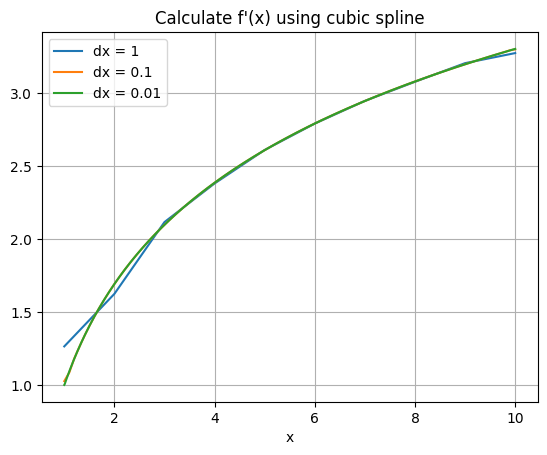

In [106]:
from matplotlib import pyplot as plt

for i in range(len(dx)):
    plt.plot(x[i], df_cs[i], label=f'dx = {dx[i]}')

plt.title("Calculate f'(x) using cubic spline")
plt.xlabel('x')
plt.grid()
plt.legend()

##### Finite difference method to calculate $f''(x)$

In [107]:
df2_fd = [np.zeros(len(t)) for t in x]

for i in range(len(x)):
    n = len(x[i])

    for j in range(1, n-1):
        df2_fd[i][j] = (y[i][j+1] - 2*y[i][j] + y[i][j-1])/dx[i]/dx[i]

    df2_fd[i][0] = (2*y[i][0] - 5*y[i][1] + 4*y[i][2] - y[i][3])/dx[i]/dx[i]
    df2_fd[i][n-1] = (-y[i][n-4] + 4*y[i][n-3] - 5*y[i][n-2] + 2*y[i][n-1])/dx[i]/dx[i]

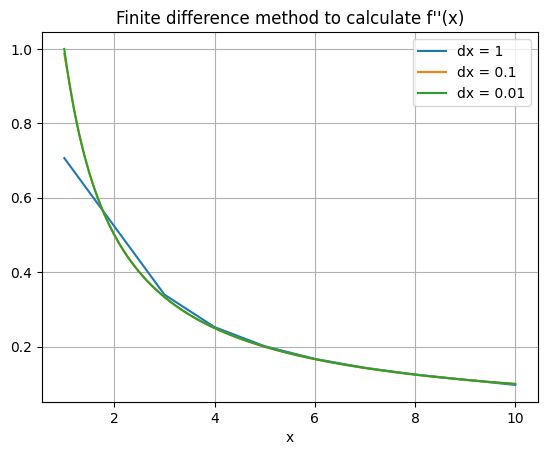

In [108]:
from matplotlib import pyplot as plt

for i in range(len(dx)):
    plt.plot(x[i], df2_fd[i], label=f'dx = {dx[i]}')

plt.title("Finite difference method to calculate f''(x)")
plt.xlabel('x')
plt.grid()
plt.legend()

##### Calculate $f''(x)$ using cubic spline

In [109]:
df2_cs = k

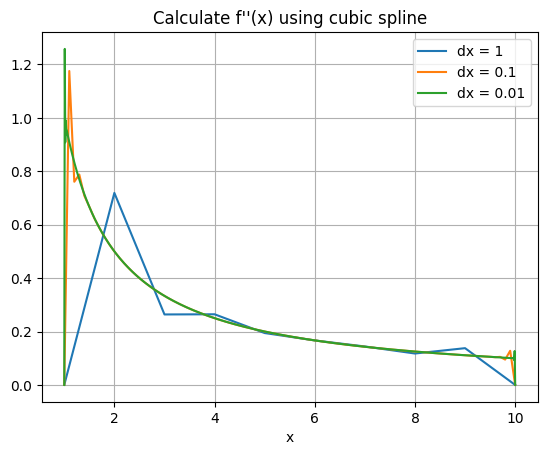

In [110]:
for i in range(len(dx)):
    plt.plot(x[i], df2_cs[i], label=f'dx = {dx[i]}')

plt.title("Calculate f''(x) using cubic spline")
plt.xlabel('x')
plt.grid()
plt.legend()

##### Comparison $f'(x)$ for $dx = 0.1$

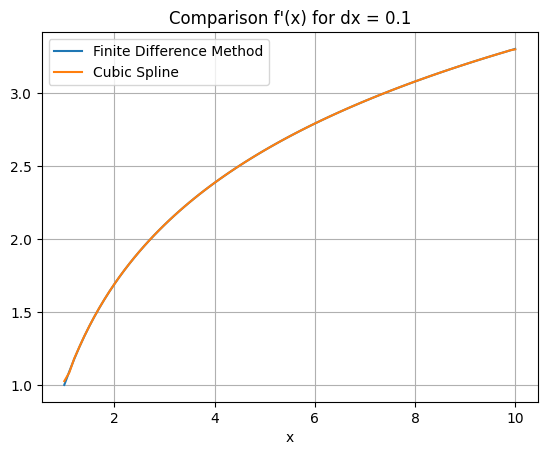

In [111]:
plt.plot(x[1], df_fd[1], label=f'Finite Difference Method')
plt.plot(x[1], df_cs[1], label=f'Cubic Spline')

plt.title("Comparison f'(x) for dx = 0.1")
plt.xlabel('x')
plt.grid()
plt.legend()

##### Comparison $f''(x)$ for $dx = 0.1$

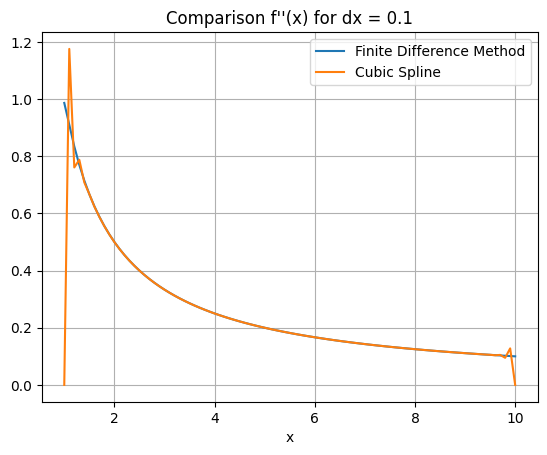

In [112]:
plt.plot(x[1], df2_fd[1], label=f'Finite Difference Method')
plt.plot(x[1], df2_cs[1], label=f'Cubic Spline')

plt.title("Comparison f''(x) for dx = 0.1")
plt.xlabel('x')
plt.grid()
plt.legend()